In [228]:
# tools 
from langchain_community.tools import ArxivQueryRun , WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper , WikipediaAPIWrapper
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["AGENTQL_API_KEY"] = os.getenv("AGENTQL_API_KEY")

In [229]:
api_wrapper_arxiv = ArxivAPIWrapper(
    top_k_results=2,
    doc_content_chars_max=5000
)
arxiv = ArxivQueryRun(
    api_wrapper=api_wrapper_arxiv,
    name="query arxiv papers"
)
print(arxiv.name)

query arxiv papers


In [230]:
wikipedia_api_wrapper = WikipediaAPIWrapper(
    top_k_results= 2,
    # lang="english",
    doc_content_chars_max=5000
)

wikipedia = WikipediaQueryRun(
    api_wrapper=wikipedia_api_wrapper,
    name="query wikipedia search"
)

print(wikipedia.name)

query wikipedia search


In [231]:
# tavily search tool 
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [232]:
tavily.invoke(
    "what is better for weight loss ? rice or roti"
)

[{'title': 'Confused Between Roti Or Rice For Weight Loss? Read To Know ...',
  'url': 'https://www.onlymyhealth.com/roti-or-rice-for-weight-loss-1695904907',
  'content': 'Making the Right Choice for Weight Loss\n\n\n\nAs you can see, both roti and rice have their own significant pros and cons. So, your choice between the two should align with your overall dietary goals and lifestyle. If you need quick energy for physical activities, rice might be more suitable, while roti can be better for portion control and long-term satiety.\n\nAlso Read:\xa0Peanut Versus Almond Butter: Which Is Better For Weight Loss [...] your overall dietary goals and lifestyle. If you need quick energy for physical activities, rice might be more suitable, while roti can be better for portion control and long-term satiety. Also Read:\xa0Peanut Versus Almond Butter: Which Is Better For Weight Loss What also matters is which grain of rice or roti you choose. Opting for whole grains like brown rice, multi-grains, 

In [233]:
arxiv.invoke(
    "what is the latest research on Llms"
)

"Published: 2024-04-19\nTitle: Large Language Model based Multi-Agents: A Survey of Progress and Challenges\nAuthors: Taicheng Guo, Xiuying Chen, Yaqi Wang, Ruidi Chang, Shichao Pei, Nitesh V. Chawla, Olaf Wiest, Xiangliang Zhang\nSummary: Large Language Models (LLMs) have achieved remarkable success across a wide\narray of tasks. Due to the impressive planning and reasoning abilities of LLMs,\nthey have been used as autonomous agents to do many tasks automatically.\nRecently, based on the development of using one LLM as a single planning or\ndecision-making agent, LLM-based multi-agent systems have achieved considerable\nprogress in complex problem-solving and world simulation. To provide the\ncommunity with an overview of this dynamic field, we present this survey to\noffer an in-depth discussion on the essential aspects of multi-agent systems\nbased on LLMs, as well as the challenges. Our goal is for readers to gain\nsubstantial insights on the following questions: What domains and 

In [234]:
# !uv pip install langchain_agentql
# playwright install
import nest_asyncio
nest_asyncio.apply()
# api key already provided above 
from langchain_agentql.tools import ExtractWebDataTool

extract_web_data_tool = ExtractWebDataTool(
    mode = "fast",
    is_scroll_to_bottom_enabled = True,
)


In [235]:
extract_web_data_tool.invoke(
    {
        "url": "https://www.agentql.com/blog",
        "query": "{ posts[] { title url date author } }",
    },
)

{'data': {'posts': [{'title': 'AgentQL Integrations: The Agentic Web begins now that every page is an enpoint',
    'url': 'https://www.agentql.com/blog/2025-recap-integrations',
    'date': 'Mar 17, 2025',
    'author': 'Rachel-Lee Nabors'},
   {'title': 'Hacking with AgentQL at Multimodal AI Agents Hackathon in San Francisco',
    'url': 'https://www.agentql.com/blog/2025-multimodal-agents-hackathon',
    'date': 'Apr 3, 2025',
    'author': 'Rachel-Lee Nabors'},
   {'title': "Scrape raw HTML with AgentQL's REST API",
    'url': 'https://www.agentql.com/blog/2025-scrape-html-api',
    'date': 'Mar 29, 2025',
    'author': 'Rachel-Lee Nabors'},
   {'title': 'Langflow + AgentQL: drag, drop, and automate Web data in AI pipelines',
    'url': 'https://www.agentql.com/blog/2025-langflow-integration',
    'date': 'Mar 19, 2025',
    'author': 'Rachel-Lee Nabors'},
   {'title': 'AgentQL Enters the Agentic World with Langchain and LlamaIndex',
    'url': 'https://www.agentql.com/blog/2025-ll

In [236]:
# combinig the tools 

tools = [arxiv , wikipedia , tavily , extract_web_data_tool]

In [237]:
# initializing the llm 
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="Gemma2-9b-It"
)

llm.invoke("what is better for weight loss ? chocolate or orange juice")

AIMessage(content='Neither chocolate nor orange juice is inherently "better" for weight loss. Both can contribute to weight gain if consumed in excess. \n\nHere\'s a breakdown:\n\n**Chocolate:**\n\n* **Pros:** Can contain antioxidants and may have mood-boosting effects. Dark chocolate (70% cacao or higher) has less sugar and more fiber than milk or white chocolate.\n* **Cons:** High in calories and fat, especially milk and white chocolate. Sugar content can contribute to weight gain.\n\n**Orange juice:**\n\n* **Pros:** Good source of Vitamin C and some fiber. Can be hydrating.\n* **Cons:** High in sugar, even 100% juice. Can spike blood sugar levels, leading to cravings and potentially overeating.\n\n**The bottom line:**\n\n* **Moderation is key:** Both chocolate and orange juice can be enjoyed in moderation as part of a healthy diet.\n* **Choose wisely:** Opt for dark chocolate with high cacao content and unsweetened or low-sugar orange juice.\n* **Focus on whole foods:** Prioritize f

In [238]:
# combining llm with tools

llm_with_tools = llm.bind_tools(tools=tools)


In [239]:
llm_with_tools.invoke("what is better for weight loss ? chocolate or orange juice") # will give tool call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_w3g3', 'function': {'arguments': '{"query":"weight loss benefits of chocolate vs orange juice"}', 'name': 'query wikipedia search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 1644, 'total_tokens': 1733, 'completion_time': 0.161818182, 'prompt_time': 0.071242213, 'queue_time': 0.24469387799999998, 'total_time': 0.233060395}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-123a74cc-7eb3-4648-99d3-5bb8e39e8acb-0', tool_calls=[{'name': 'query wikipedia search', 'args': {'query': 'weight loss benefits of chocolate vs orange juice'}, 'id': 'call_w3g3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1644, 'output_tokens': 89, 'total_tokens': 1733})

In [240]:
llm_with_tools.invoke("daily routine of justin bieber")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jen6', 'function': {'arguments': '{"query":"daily routine of justin bieber"}', 'name': 'query wikipedia search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 1638, 'total_tokens': 1724, 'completion_time': 0.156363636, 'prompt_time': 0.070506365, 'queue_time': 0.24472718699999996, 'total_time': 0.226870001}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-dff45f8b-ac34-4a92-98af-562f501bf410-0', tool_calls=[{'name': 'query wikipedia search', 'args': {'query': 'daily routine of justin bieber'}, 'id': 'call_jen6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1638, 'output_tokens': 86, 'total_tokens': 1724})

# workflow 

In [241]:
# state schema
from langchain_core.messages import AnyMessage # human message or ai-message
from typing_extensions import TypedDict 
from typing import Annotated # labelling
from langgraph.graph import add_messages ## reducers in langgraph --> not overwrite in the state but append the messages

In [242]:
# designing state schema
class State(TypedDict):
    messages : Annotated[list[AnyMessage] , add_messages]

In [243]:
# libraries for the chatbot langgraph 
from IPython.display import Image , display 
from langgraph.graph import StateGraph , START ,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [244]:
# node definition
def tool_calling_llm(state : State):
    # Invoke LLM with the messages from state and return as a list in messages key
    messages = llm_with_tools.invoke(state["messages"])
    return {"messages": [messages]}

# building graph 
builder = StateGraph(State)
builder.add_node("tool_calling_llm" , tool_calling_llm) # node  1 
builder.add_node("tools" , ToolNode(tools)) # node 2 

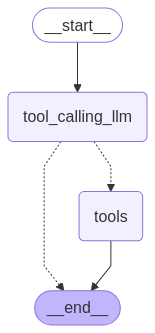

In [245]:
## EDGES 
builder.add_edge(START , "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # if message(result) => tool call -> tool routes to tools 
    # if ! tool call -> tool condition routes to 
    tools_condition,
)
builder.add_edge("tools" , END)

graph = builder.compile()
graph

# checking output

In [246]:
from langchain_core.messages import HumanMessage

messages = graph.invoke(
    {"messages": [HumanMessage(content="1706.03762")]}
)

for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  query arxiv papers (call_z30v)
 Call ID: call_z30v
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: query arxiv papers

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, based
solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine translati

In [247]:
messages = graph.invoke(
    {"messages": [HumanMessage(content="who is salman khan ?")]}
)

for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

who is salman khan ?
================================== Ai Message ==================================
Tool Calls:
  query wikipedia search (call_8qte)
 Call ID: call_8qte
  Args:
    query: salman khan
================================= Tool Message =================================
Name: query wikipedia search

Page: Salman Khan
Summary: Abdul Rashid Salim Salman Khan (pronounced [səlˈmɑːn xɑːn, -kʰɑːn̪]; born 27 December 1965) is an Indian actor, film producer, and television personality who predominantly works in Hindi films. In a career spanning over three decades, his awards include two National Film Awards as a film producer, and two Filmfare Awards as an actor. He has been cited in the media as one of the most popular and commercially successful actors of Indian cinema. Forbes included him in listings of the highest-paid celebrities in the world, in 2015 and 2018, with him being the highest-ranked I

In [248]:
messages = graph.invoke(
    {"messages": [HumanMessage(content="what do i eat for faster weight loss , roti or rice ?")]}
)

for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

what do i eat for faster weight loss , roti or rice ?
================================== Ai Message ==================================
Tool Calls:
  query wikipedia search (call_xjre)
 Call ID: call_xjre
  Args:
    query: healthiest food for weight loss
================================= Tool Message =================================
Name: query wikipedia search

Page: Overweight
Summary: Being overweight is having more body fat than is optimally healthy. Being overweight is especially common where food supplies are plentiful and lifestyles are sedentary.
As of 2003, excess weight reached epidemic proportions globally, with more than 1 billion adults being either overweight or obese. In 2013, this increased to more than 2 billion. Increases have been observed across all age groups.
A healthy body requires a minimum amount of fat for proper functioning of the hormonal, reproductive, and immune systems, as 

In [250]:
messages = graph.invoke(
    {"messages": [HumanMessage(content="Extract data from https://www.agentql.com/blog using the following agentql query: { posts[] { title url date author } }")]}
)

for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

Extract data from https://www.agentql.com/blog using the following agentql query: { posts[] { title url date author } }
================================== Ai Message ==================================
Tool Calls:
  extract_web_data_with_rest_api (call_x6fe)
 Call ID: call_x6fe
  Args:
    url: https://www.agentql.com/blog
    query: { posts[] { title url date author } }
================================= Tool Message =================================
Name: extract_web_data_with_rest_api

{"data": {"posts": [{"title": "AgentQL Integrations: The Agentic Web begins now that every page is an enpoint", "url": "https://www.agentql.com/blog/2025-recap-integrations", "date": "Mar 17, 2025", "author": "Rachel-Lee Nabors"}, {"title": "Hacking with AgentQL at Multimodal AI Agents Hackathon in San Francisco", "url": "https://www.agentql.com/blog/2025-multimodal-agents-hackathon", "date": "Apr 3, 2025", "author": "Rach